# Classificação - Titanic Dataset

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Importando os dados

In [2]:
data_resultados_teste = pd.read_csv('titanic_data\gender_submission.csv')

In [3]:
data_treino = pd.read_csv(r"titanic_data/train.csv")

In [4]:
data_teste = pd.read_csv(r"titanic_data\test.csv")

## Conhecendo os dados

In [5]:
data_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dicionario = {
    "Survived": {'sim' : 1, 'Não' : 0},
    "Pclass": {'1st': 1, '2nd': 2, '3rd':3},
    "sibsp" : 'of siblings / spouses aboard the Titanic',
    "parch": 'of parents / children aboard the Titabnic',
    "Embarked": { 'Cherbourg':'C',  'Queenstown':'Q', 'Southampton':'S' }
}

In [7]:
data_treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
nulos = data_treino.isnull().sum()
nulos

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

impacto da remoção dos nulos dos dados

In [9]:
soma_nulos = nulos['Age'] + nulos['Cabin']
porcento_nulos = (soma_nulos*100)/len(data_treino)
porcento_nulos

96.96969696969697

In [10]:
print(f'Os nulos representam {porcento_nulos :.2f} dos dados')


Os nulos representam 96.97 dos dados


Opções: 1- Não utilizar as colunas com dados nulos     2- Preencher os dados com estimativas

### Opção 2 - preenchendo os dados

In [11]:
cabine = data_treino[['Cabin','Fare','Pclass']]
cabine_normalizado = cabine[cabine.Cabin.notnull()]

In [12]:
classe = []
for i in cabine_normalizado['Cabin']:

    classe.append(i[0])

In [13]:
cabine_normalizado = cabine_normalizado.drop('Cabin',axis=1,inplace=False)
cabine_normalizado['Cabin'] = np.array(classe)

In [14]:
cabine_normalizado.groupby(['Cabin','Pclass'])['Fare'].mean()

Cabin  Pclass
A      1          39.623887
B      1         113.505764
C      1         100.151341
D      1          63.324286
       2          13.166675
E      1          55.740168
       2          11.587500
       3          11.000000
F      2          23.750000
       3          10.611660
G      3          13.581250
T      1          35.500000
Name: Fare, dtype: float64

In [15]:
cabine_normalizado.groupby(['Cabin','Pclass'])['Fare'].std()

Cabin  Pclass
A      1          17.975333
B      1         109.301500
C      1          70.225588
D      1          26.172260
       2           0.420829
E      1          30.386910
       2           1.283469
       3           2.554775
F      2          11.631239
       3           6.566714
G      3           3.601222
T      1                NaN
Name: Fare, dtype: float64

In [16]:
media_cabine = cabine_normalizado.groupby(['Cabin','Pclass'])['Fare'].mean()
desvio_cabine = cabine_normalizado.groupby(['Cabin','Pclass'])['Fare'].std()


In [17]:
preco_cabin = []

for key in media_cabine.index:
    preco_cabin.append((media_cabine[key]-desvio_cabine[key],media_cabine[key]+desvio_cabine[key]))


print(preco_cabin)


[(21.648553705599205, 57.59921962773412), (4.204263573663951, 222.80726408591053), (29.925752316408477, 170.37692903952373), (37.1520258839799, 89.4965465298132), (12.745845791769392, 13.587504208230607), (25.35325787531638, 86.12707812468363), (10.304031392410915, 12.870968607589086), (8.445225058835906, 13.554774941164094), (12.118761274665786, 35.381238725334214), (4.0449458461784715, 17.17837415382153), (9.98002769592971, 17.18247230407029), (nan, nan)]


#### Nota-se que os dados de Cabine podem ser estimados com segurança a partir do preço (Fare) combinados com a classe (Pclass), dessa forma a remoção dessa coluna, não representará perda significativa de finformação, já que esses dados são correlacionados.


In [18]:
data_treino_2 = data_treino.drop(['Cabin','Ticket','Name','PassengerId'],axis=1)


In [19]:
nulos = data_treino_2.isnull().sum()
nulos

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
soma_nulos = nulos['Age']
porcento_nulos = (soma_nulos*100)/len(data_treino)
porcento_nulos

19.865319865319865

In [21]:
len(data_treino)-(soma_nulos)

714

In [22]:
data_treino_3 = data_treino_2.dropna()

In [23]:
len(data_treino_3)

712

In [24]:
data_treino_3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [25]:

data_treino_4 = data_treino_3.replace({"Sex":{'male':0,'female':1},
                                      "Embarked":{'S':0,'Q':0.5,'C':1}})

In [26]:
data_treino_4

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,0.5
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


## Verificando correlações

Text(0.5, 1.0, 'Embarked x Age')

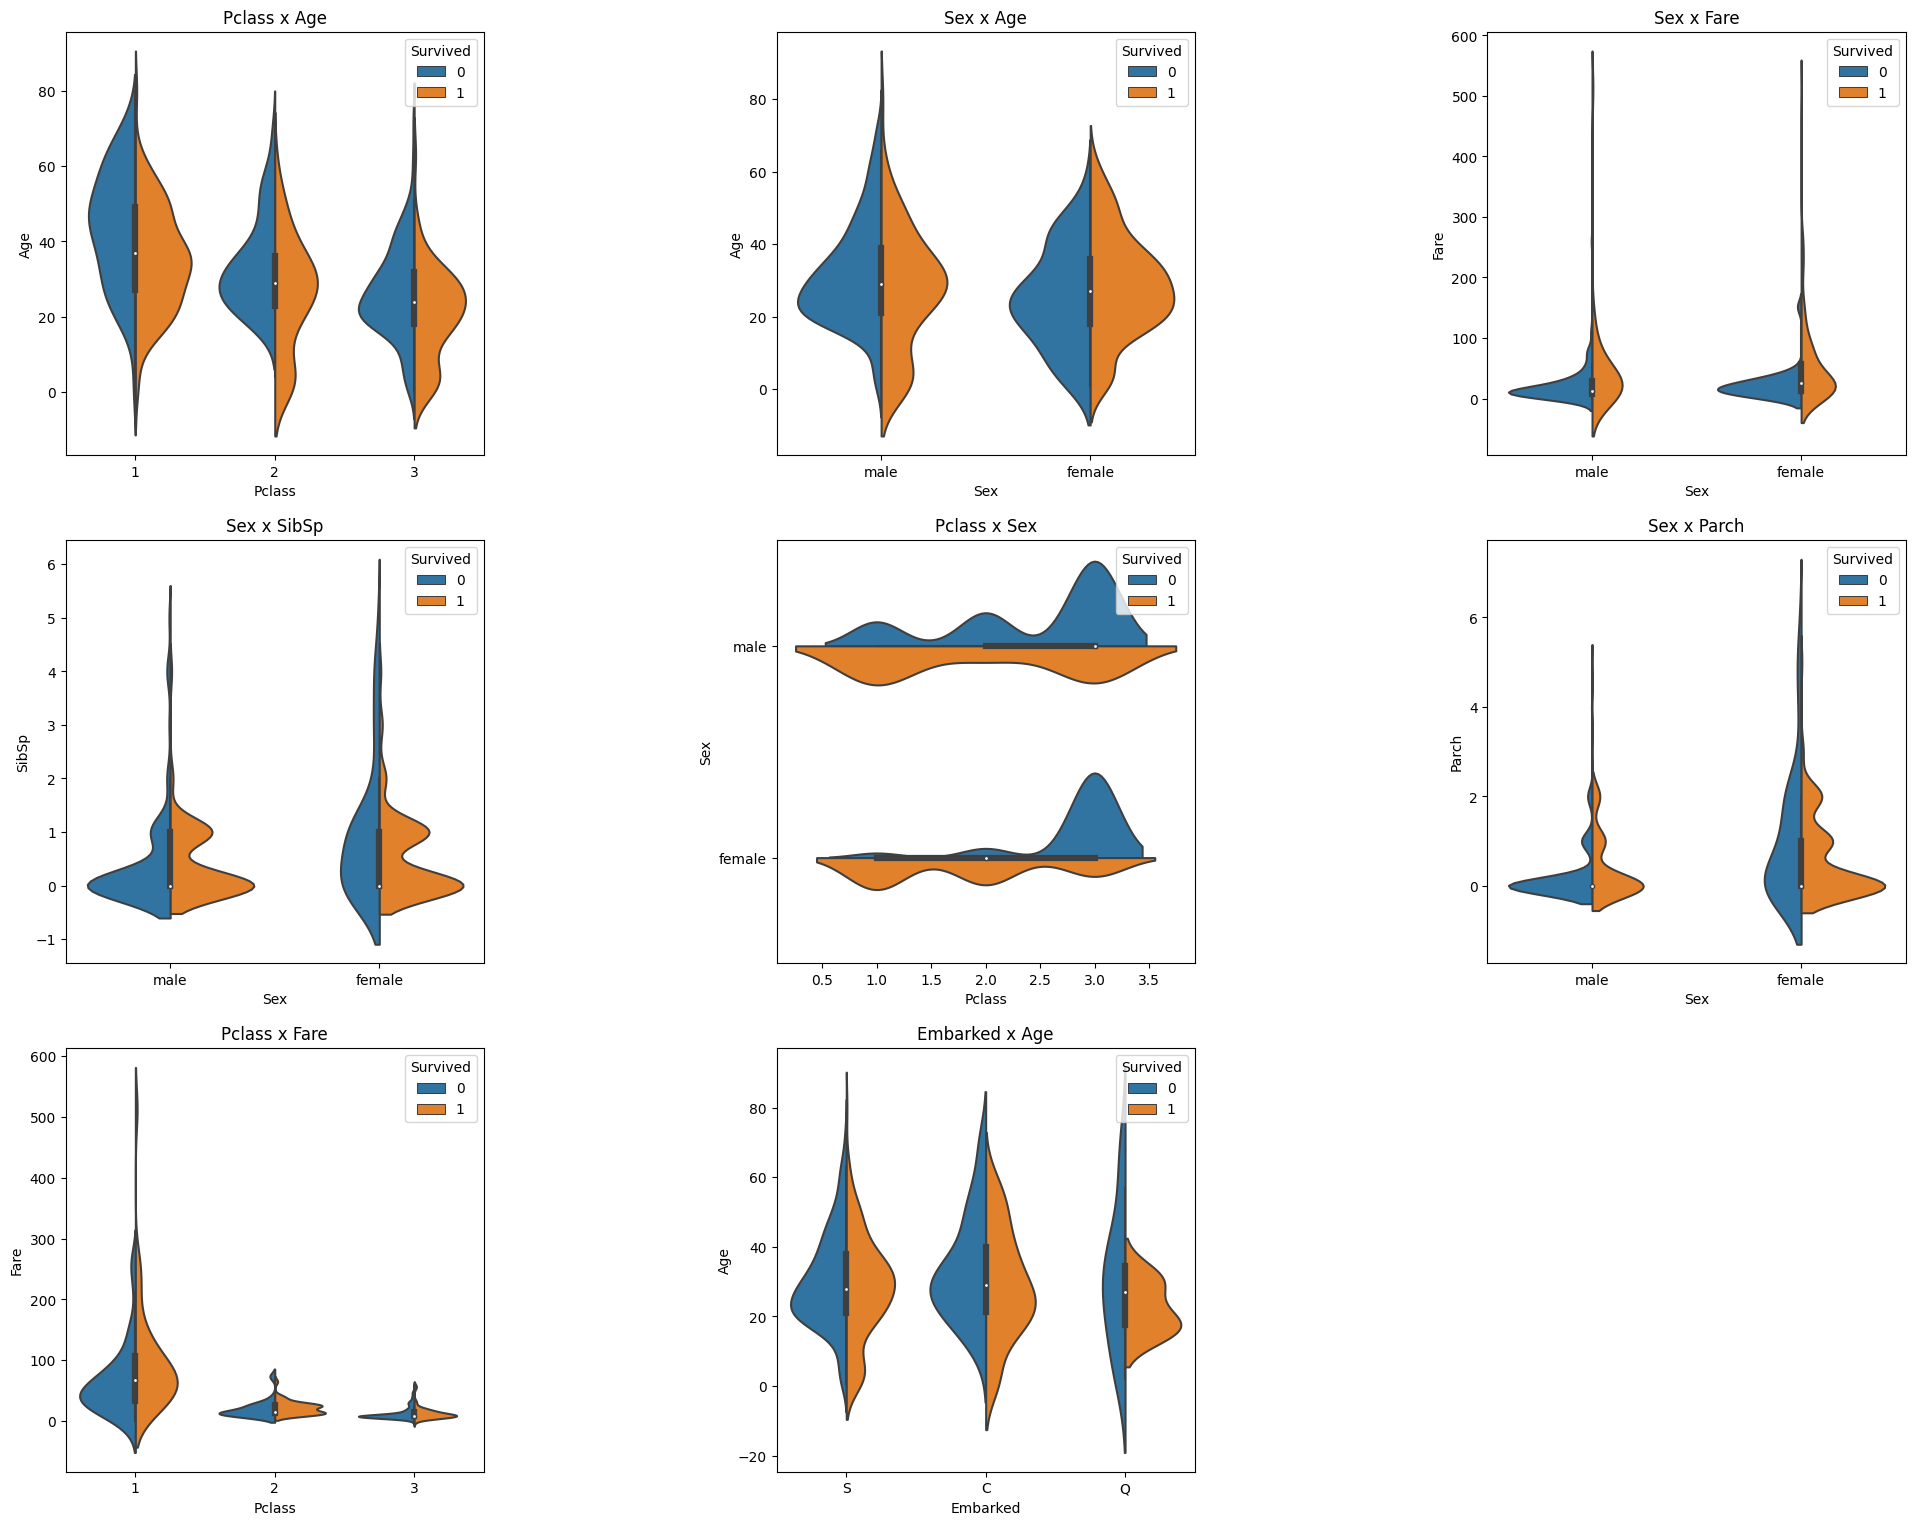

In [27]:
fig = plt.figure()
plt.subplot(3,3,1)
plt.subplots_adjust(right=3,wspace=0.7,top=5,bottom=2)

sns.violinplot(data= data_treino_3,
           x= "Pclass",
           y= 'Age',
           hue= 'Survived',
          split= True)
plt.title('Pclass x Age')


plt.subplot(3,3,2)
sns.violinplot(data= data_treino_3,
           x= 'Sex',
            y= 'Age',
           hue= 'Survived',
          split= True)
plt.title('Sex x Age')




plt.subplot(3,3,3)
sns.violinplot(data= data_treino_3,
           x= 'Sex',
            y= 'Fare',
           hue= 'Survived',
          split= True)
plt.title('Sex x Fare')


plt.subplot(3,3,4)
sns.violinplot(data= data_treino_3,
          x= 'Sex',
         y= 'SibSp',
           hue= 'Survived',
          split= True)
plt.title('Sex x SibSp')



plt.subplot(3,3,5)
sns.violinplot(data= data_treino_3,
          x= 'Pclass',
               y= 'Sex',
           hue= 'Survived',
          split= True)
plt.title('Pclass x Sex')


plt.subplot(3,3,6)
sns.violinplot(data= data_treino_3,
          x= 'Sex',
               y= 'Parch',
           hue= 'Survived',
          split= True)
plt.title('Sex x Parch')




plt.subplot(3,3,7)
sns.violinplot(data= data_treino_3,
          x= 'Pclass',
        y= 'Fare',
           hue= 'Survived',
          split= True)
plt.title('Pclass x Fare')





plt.subplot(3,3,8)
sns.violinplot(data= data_treino_3,
          x= 'Embarked',
               y= 'Age',
           hue= 'Survived',
          split= True)
plt.title('Embarked x Age')




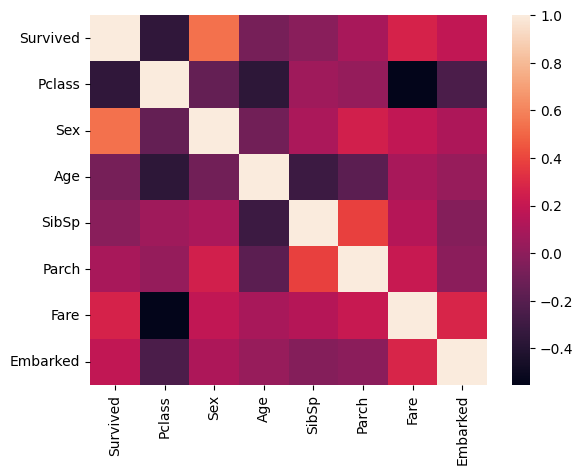

In [28]:
matriz_corr = data_treino_4.corr()
sns.heatmap(matriz_corr)
plt.show()

#### Alta correlação entre o sexo do passageriro(a) e asobrevivencia. Requer atenção no treino do meodelo

### Preparando os dados de validação

In [29]:
data_teste.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
len(data_teste)

418

In [31]:
data_resultados_teste.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [32]:
data_teste_1 = pd.concat([data_teste,data_resultados_teste],axis=1)


In [33]:
data_teste_1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [34]:
data_teste_2 = data_teste_1[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
data_teste_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [35]:
data_teste_2.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [36]:
data_teste_2.dropna(inplace=True)

C:\Users\guilh\AppData\Local\Temp\ipykernel_23336\2550956188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_teste_2.dropna(inplace=True)


In [37]:
data_teste_2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [38]:
data_validation = data_teste_2.replace({"Sex":{'male':0,'female':1},
                                       "Embarked":{'S':0,'Q':0.5,'C':1}})

In [39]:
data_validation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0.5
1,1,3,1,47.0,1,0,7.0000,0.0
2,0,2,0,62.0,0,0,9.6875,0.5
3,0,3,0,27.0,0,0,8.6625,0.0
4,1,3,1,22.0,1,1,12.2875,0.0
...,...,...,...,...,...,...,...,...
409,1,3,1,3.0,1,1,13.7750,0.0
411,1,1,1,37.0,1,0,90.0000,0.5
412,1,3,1,28.0,0,0,7.7750,0.0
414,1,1,1,39.0,0,0,108.9000,1.0


## Escolhendo um modelo

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [41]:
from sklearn.dummy import DummyClassifier

In [42]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.pipeline import Pipeline

In [43]:

classificadores = {
    "Nearest Neighbors": KNeighborsClassifier(3),
    "Linear SVM": Pipeline([('scaler',StandardScaler()),('modelo',SVC(kernel="linear", C=0.025))]),
    
    "RBF SVM": Pipeline([('scaler',StandardScaler()),('modelo',SVC(gamma=2, C=1))]),
    
    "Gaussian Process" :GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Decision Tree": DecisionTreeClassifier(max_depth=5,random_state=123),
    "Random Forest": RandomForestClassifier(n_estimators=10, max_features=1,random_state=123),
    "Neural Net": MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    'Dummy': DummyClassifier(strategy='most_frequent',random_state=123)
}


In [44]:
classificadores['Random Forest']

RandomForestClassifier(max_features=1, n_estimators=10, random_state=123)

#  Testando

In [45]:
import numpy as np

In [46]:
def teste_modelos(modelo):
    n = 3
    cv = StratifiedKFold(n,shuffle=True,random_state=123)
    resultados = cross_validate(modelo,
                                X= data_treino_4[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']],
                                y = data_treino_4['Survived'],
                                cv = cv,
                               return_estimator=True)
    media = resultados['test_score'].mean()
    desvio = resultados['test_score'].std()
    
    
  
    r = np.sort(np.array(resultados['test_score']))
    
    
    intervalo = (media-desvio,media+desvio)
    return media,intervalo,resultados['estimator'][2]

In [47]:
resultados = []
for key,value in classificadores.items():
    r = teste_modelos(value)
    resultados.append([key,r[0],r[1][0],r[1][1],r[2]])


C:\Users\guilh\OneDrive\Documentos\GitHub\Titanic\venv\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


In [48]:
data_results = pd.DataFrame(resultados,columns=['Modelo','média','Intervalo_inferior','Intervalo_superior','instancia'])

In [49]:
data_results

,Modelo,média,Intervalo_inferior,Intervalo_superior,instancia
0,Nearest Neighbors,0.696663,0.674585,0.718742,KNeighborsClassifier(n_neighbors=3)
1,Linear SVM,0.779509,0.769327,0.789691,"(StandardScaler(), SVC(C=0.025, kernel='linear'))"
2,RBF SVM,0.772483,0.763667,0.781299,"(StandardScaler(), SVC(C=1, gamma=2))"
3,Gaussian Process,0.779592,0.728547,0.830637,GaussianProcessClassifier(kernel=1**2 * RBF(le...
4,Decision Tree,0.810381,0.801027,0.819735,"DecisionTreeClassifier(max_depth=5, random_sta..."
5,Random Forest,0.790743,0.773922,0.807564,"(DecisionTreeClassifier(max_features=1, random..."
6,Neural Net,0.794980,0.770892,0.819069,"MLPClassifier(alpha=1, max_iter=1000)"
7,AdaBoost,0.773901,0.754021,0.793781,"(DecisionTreeClassifier(max_depth=1, random_st..."
8,Naive Bayes,0.775296,0.759612,0.790979,GaussianNB()
9,QDA,0.800571,0.787678,0.813463,QuadraticDiscriminantAnalysis()


In [50]:
def validate(modelo):
    return modelo.score(data_validation[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']],data_validation['Survived'])


In [51]:
resultados_validate = []
for i in data_results['instancia']:
    r = validate(i)
    resultados_validate.append(r)


In [52]:
data_results['validacao'] = resultados_validate

In [53]:
data_results

,Modelo,média,Intervalo_inferior,Intervalo_superior,instancia,validacao
0,Nearest Neighbors,0.696663,0.674585,0.718742,KNeighborsClassifier(n_neighbors=3),0.598187
1,Linear SVM,0.779509,0.769327,0.789691,"(StandardScaler(), SVC(C=0.025, kernel='linear'))",1.000000
2,RBF SVM,0.772483,0.763667,0.781299,"(StandardScaler(), SVC(C=1, gamma=2))",0.836858
3,Gaussian Process,0.779592,0.728547,0.830637,GaussianProcessClassifier(kernel=1**2 * RBF(le...,0.891239
4,Decision Tree,0.810381,0.801027,0.819735,"DecisionTreeClassifier(max_depth=5, random_sta...",0.930514
5,Random Forest,0.790743,0.773922,0.807564,"(DecisionTreeClassifier(max_features=1, random...",0.806647
6,Neural Net,0.794980,0.770892,0.819069,"MLPClassifier(alpha=1, max_iter=1000)",0.909366
7,AdaBoost,0.773901,0.754021,0.793781,"(DecisionTreeClassifier(max_depth=1, random_st...",0.900302
8,Naive Bayes,0.775296,0.759612,0.790979,GaussianNB(),0.873112
9,QDA,0.800571,0.787678,0.813463,QuadraticDiscriminantAnalysis(),0.876133


In [54]:
Best_model = data_results.loc[data_results['Modelo'] == 'Decision Tree']

In [55]:
Best_model

,Modelo,média,Intervalo_inferior,Intervalo_superior,instancia,validacao
4,Decision Tree,0.810381,0.801027,0.819735,"DecisionTreeClassifier(max_depth=5, random_sta...",0.930514


In [56]:
from sklearn.metrics import confusion_matrix

In [60]:
modelo = Best_model['instancia'][4]
matriz_confusao = confusion_matrix(data_validation['Survived'],
                                   modelo.predict(data_validation[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
                                  )

In [61]:
tn, fp, fn, tp = matriz_confusao.ravel()

In [62]:
matriz_confusao = pd.DataFrame(matriz_confusao,index=['Dead','Survived'],columns=['Dead','Survived'])

In [63]:
print(f'True negative = {tn}\nFalse positive = {fp} \nFalse negative = {fn} \nTrue positive = {tp}')

True negative = 189
False positive = 15 
False negative = 8 
True positive = 119


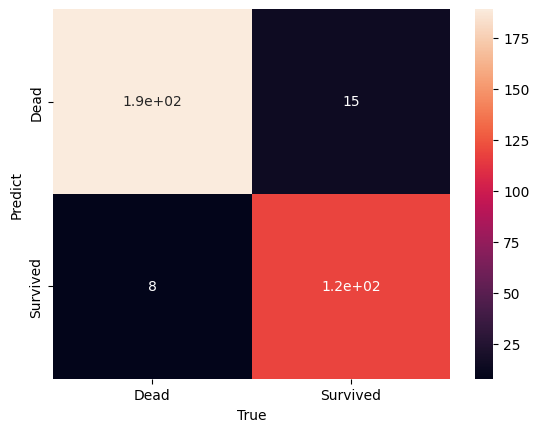

In [64]:
ax = sns.heatmap(matriz_confusao,
                 annot=True,
                )
ax.set(xlabel="True", ylabel="Predict")

plt.show()